# Clustering

In [95]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 23

In [127]:
df = pd.read_csv('data/x_train.csv')

In [30]:
decode_dict = {'age': (18, 95), 'default': (0, 1), 'balance': (-892.0, 19313.0), 'housing': (0, 1), 'loan': (0, 1), 'day': (1, 31), 'month': (1, 12), 'duration': (8.0, 1531.0), 'campaign': (1.0, 21.0), 'pdays': (-1.0, 392.0), 'previous': (0.0, 12.0), 'job_admin.': (0, 1), 'job_blue-collar': (0, 1), 'job_entrepreneur': (0, 1), 'job_housemaid': (0, 1), 'job_management': (0, 1), 'job_retired': (0, 1), 'job_self-employed': (0, 1), 'job_services': (0, 1), 'job_student': (0, 1), 'job_technician': (0, 1), 'job_unemployed': (0, 1), 'job_unknown': (0, 1), 'marital_divorced': (0, 1), 'marital_married': (0, 1), 'marital_single': (0, 1), 'education_primary': (0, 1), 'education_secondary': (0, 1), 'education_tertiary': (0, 1), 'education_unknown': (0, 1), 'contact_cellular': (0, 1), 'contact_telephone': (0, 1), 'contact_unknown': (0, 1), 'poutcome_failure': (0, 1), 'poutcome_other': (0, 1), 'poutcome_success': (0, 1), 'poutcome_unknown': (0, 1)}

In [31]:
print(decode_dict)

{'age': (18, 95), 'default': (0, 1), 'balance': (-892.0, 19313.0), 'housing': (0, 1), 'loan': (0, 1), 'day': (1, 31), 'month': (1, 12), 'duration': (8.0, 1531.0), 'campaign': (1.0, 21.0), 'pdays': (-1.0, 392.0), 'previous': (0.0, 12.0), 'job_admin.': (0, 1), 'job_blue-collar': (0, 1), 'job_entrepreneur': (0, 1), 'job_housemaid': (0, 1), 'job_management': (0, 1), 'job_retired': (0, 1), 'job_self-employed': (0, 1), 'job_services': (0, 1), 'job_student': (0, 1), 'job_technician': (0, 1), 'job_unemployed': (0, 1), 'job_unknown': (0, 1), 'marital_divorced': (0, 1), 'marital_married': (0, 1), 'marital_single': (0, 1), 'education_primary': (0, 1), 'education_secondary': (0, 1), 'education_tertiary': (0, 1), 'education_unknown': (0, 1), 'contact_cellular': (0, 1), 'contact_telephone': (0, 1), 'contact_unknown': (0, 1), 'poutcome_failure': (0, 1), 'poutcome_other': (0, 1), 'poutcome_success': (0, 1), 'poutcome_unknown': (0, 1)}


In [3]:
df.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
count,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,...,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000
mean,0.297385,0.017831,0.105766,0.556022,0.160347,0.492494,0.467350,0.159173,0.083092,0.096453,...,0.283631,0.151950,0.513678,0.294962,0.039410,0.649196,0.064103,0.105273,0.040132,0.033676
std,0.138661,0.132341,0.108254,0.496863,0.366936,0.277320,0.217746,0.149147,0.127125,0.236212,...,0.450770,0.358981,0.499824,0.456036,0.194572,0.477232,0.244941,0.306911,0.196273,0.180399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.000000,0.047909,0.000000,0.000000,0.233333,0.363636,0.063033,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.000000,0.066568,1.000000,0.000000,0.500000,0.454545,0.112278,0.050000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.389610,0.000000,0.113536,1.000000,0.000000,0.666667,0.636364,0.202232,0.100000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.467532,0.0,0.091908,0.0,0.0,0.833333,0.636364,0.221274,0.15,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.272727,0.0,0.044147,0.0,0.0,0.866667,0.636364,0.091267,0.15,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.059292,0.0,0.0,0.433333,0.636364,0.067630,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.233766,0.0,0.722098,0.0,0.0,0.266667,0.454545,0.084045,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.0,0.057214,1.0,1.0,0.500000,0.454545,0.139199,0.00,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Wizualizacja przy pomocy PCA

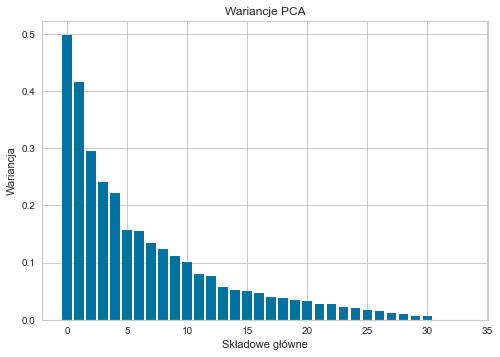

In [16]:
pca = PCA()
pca.fit(df)
variances = pca.explained_variance_
x = np.arange(len(variances))
plt.bar(x, variances)
plt.title('Wariancje PCA')
plt.xlabel('Składowe główne')
plt.ylabel('Wariancja')
plt.show()


In [82]:
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,22152.0,4.779292e-17,0.705392,-1.100283,-0.570920,-0.224552,0.667075,1.562608
col2,22152.0,1.122652e-17,0.644601,-1.012303,-0.605372,-0.117278,0.546055,1.264967
col3,22152.0,-4.907595e-17,0.542401,-1.180257,-0.428362,-0.021276,0.411937,1.666150


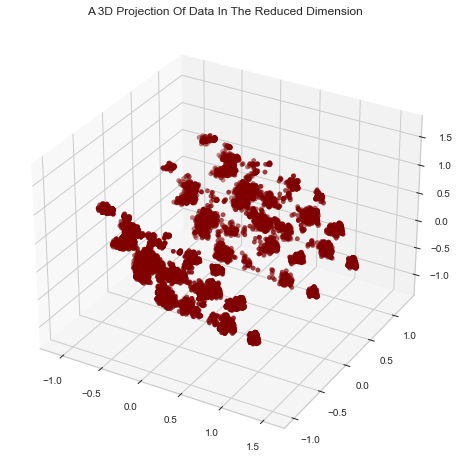

In [83]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

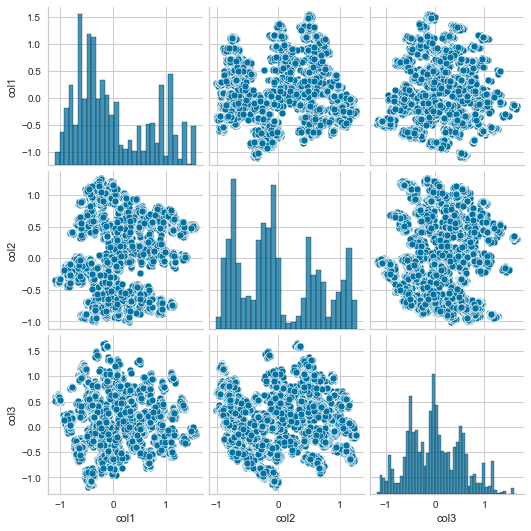

In [12]:
# wykresy zmiennych
df=PCA_ds
sns.pairplot(df)

## Poszukiwanie optymalnej liczby klastrów

In [7]:
def count_clustering_scores(X, cluster_num, model, score_fun):
   
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

### Kmeans

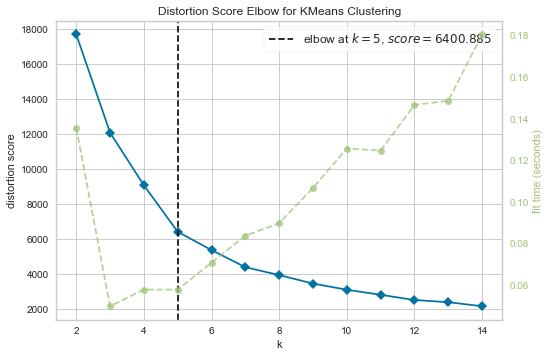

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
Elbow_M = KElbowVisualizer(KMeans(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

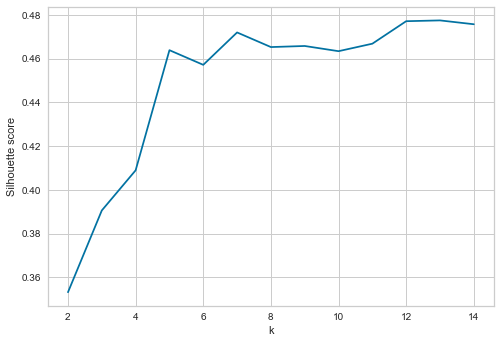

In [10]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 12

### Kmedoids

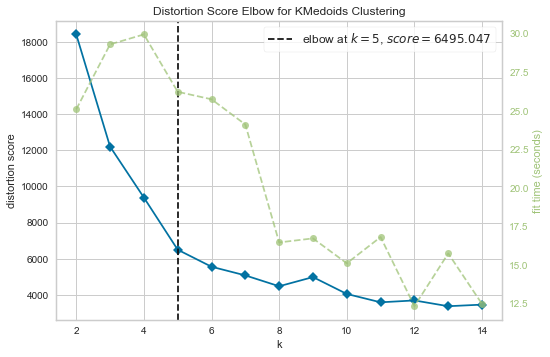

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
Elbow_M = KElbowVisualizer(KMedoids(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

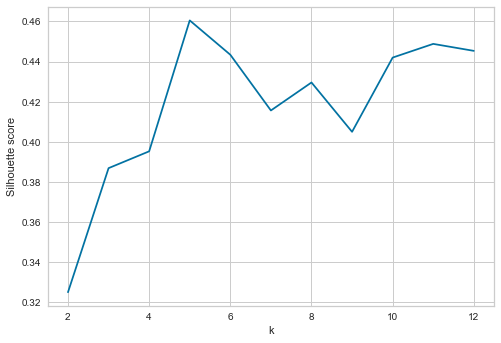

In [9]:
cluster_num_seq = range(2, 13)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMedoids, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 5

### AgglomerativeClustering

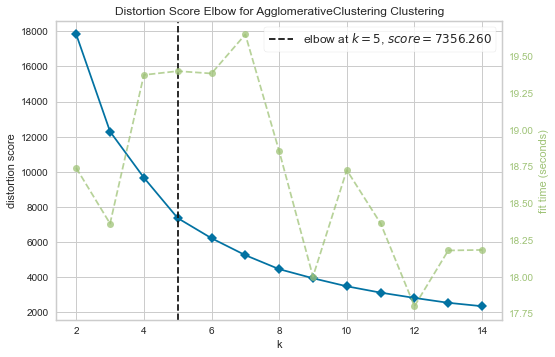

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

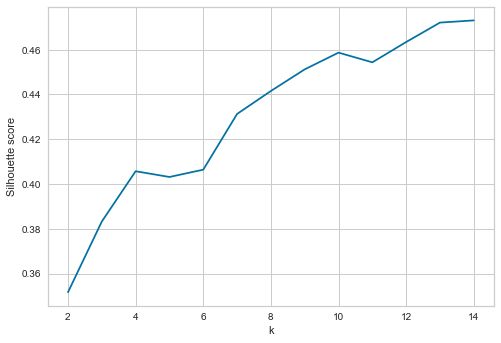

In [13]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 14

### Gap Statistics

In [15]:
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  

Optimal k is:  19


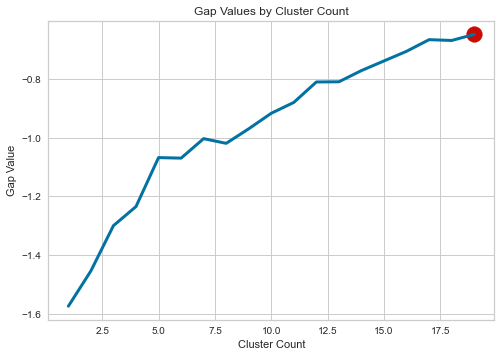

In [16]:
k, gapdf = optimalK(df, nrefs=3, maxClusters=15)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

### Dendogram

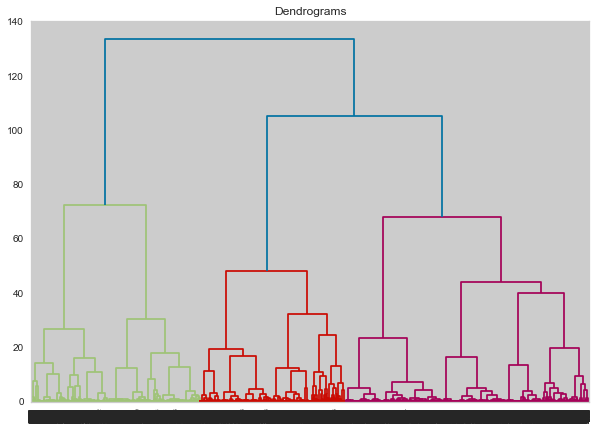

In [17]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### AIC And BIC From GMMs

In [18]:
aic_score = {} 
bic_score = {}

for i in range(1,15): 
  gmm = GaussianMixture(n_components=i, random_state=0).fit(df)
  aic_score[i] = gmm.aic(df)
  bic_score[i] = gmm.bic(df)


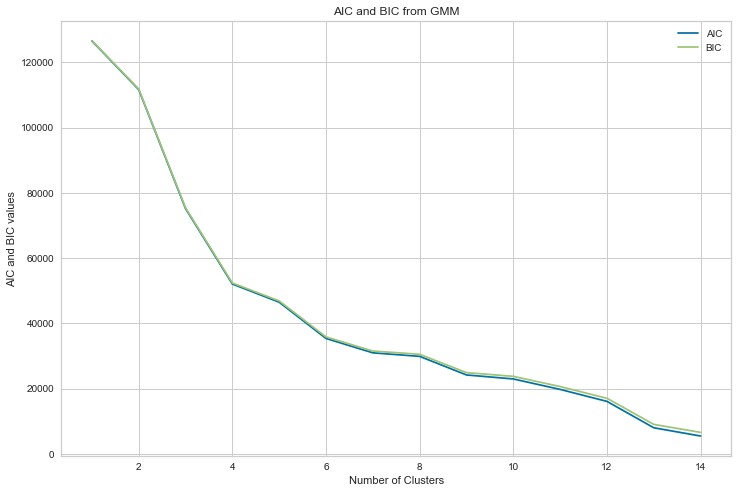

In [19]:
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

In [20]:
results = [6,5,7,7,5]
median = np.median(results)
median

6.0

# Clusterization

In [86]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(df)

### 1. Kmeans

In [87]:
k = 5 
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)
labels = kmeans.labels_

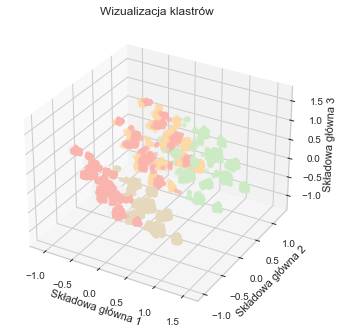

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 2. MiniBatchKMeans

In [89]:
miniBatchKmeans = MiniBatchKMeans(n_clusters= 5)
miniBatchKmeans.fit(df)
labels = miniBatchKmeans.labels_

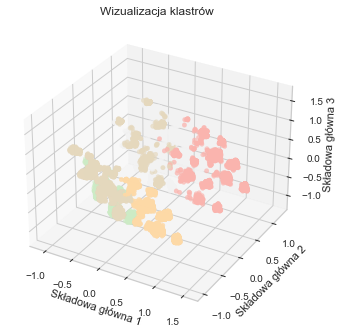

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 3. Agglomerative Clustering

In [91]:
AC = AgglomerativeClustering(n_clusters= 5)
AC.fit(df)
labels = AC.labels_

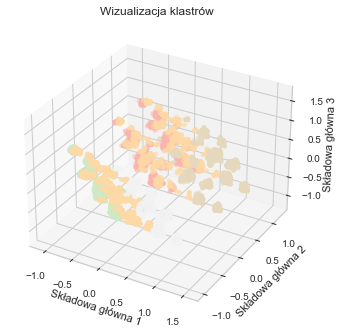

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 4. DBSCAN

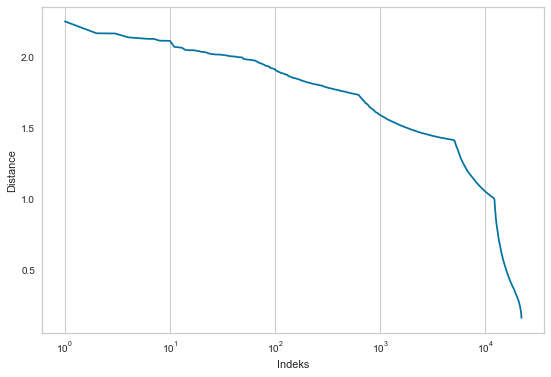

In [93]:
minPts = 68
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks')
plt.ylabel('Distance')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)
plt.xscale('log')
plt.grid(axis='y')
plt.show()

In [108]:
dbs = cluster.DBSCAN(eps=0.33, min_samples= minPts)
dbs.fit(df)
labels = dbs.labels_

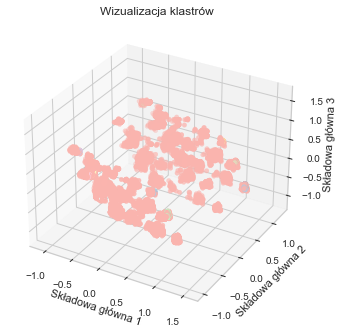

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

Po wstępnej analizie stwierdziliśmy, że najlepiej wypada Agglomerative Clustering

## Agglomerative Clustering - dalsza analiza

Zauważmy, że przeważającą role podczas klasteryzacji pełni praca

In [134]:
def result(df, k, labels):
    result_df = pd.DataFrame(columns=df.columns)
    for cluster in range(5):
        cluster_elements = df[labels == cluster]
        cluster_medians = np.median(cluster_elements, axis=0)
        result_df.loc[cluster]=cluster_medians
    return result_df

def decode(df, prefix, dictionary):

    for column in df.columns:
        if column.startswith(prefix):
            df[column] *= 10/7
        df[column] *= (dictionary[column][1] - dictionary[column][0])
        df[column] += dictionary[column][0]
    return df

def importance_score(df, k, labels):
    n_samples, n_features = df.shape
    importance_df = pd.DataFrame(columns=df.columns)
    cluster_centers = np.zeros((k, n_features))
    for cluster_id in range(k):
        cluster_points = df.iloc[labels == cluster_id]
        cluster_centers[cluster_id] = np.mean(cluster_points, axis=0)

    importance_scores = np.zeros(n_features)
    for i in range(n_samples):
        cluster_center = cluster_centers[labels[i]]
        importance_scores += (df.iloc[i] - cluster_center) ** 2

    importance_scores /= n_samples

    for i, score in enumerate(importance_scores):
        print(f"Importance score for {df.columns[i]}: {score}")
    importance_df.loc[0]=importance_scores
    
    return importance_df

def filter_columns_by_prefix(df, prefix):
    columns_with_prefix = [col for col in df.columns if col.startswith(prefix)]
    return columns_with_prefix

def sum_one_hot_columns(importance_df):
    
    importance_sum = importance_df
    jobs = filter_columns_by_prefix(importance_sum, "job")
    marital = filter_columns_by_prefix(importance_sum, "marital")
    education = filter_columns_by_prefix(importance_sum, "education")
    poutcome = filter_columns_by_prefix(importance_sum, "poutcome")
    importance_sum['job'] = importance_sum[jobs].sum(axis=1)
    importance_sum['marital'] = importance_sum[marital].sum(axis=1)
    importance_sum['education'] = importance_sum[education].sum(axis=1)
    importance_sum['poutcome'] = importance_sum[poutcome].sum(axis=1)
    importance_sum.drop(jobs, axis = 'columns', inplace = True)
    importance_sum.drop(marital, axis = 'columns', inplace = True)
    importance_sum.drop(education, axis = 'columns', inplace = True)
    importance_sum.drop(poutcome, axis = 'columns', inplace = True)
    
    return importance_sum, jobs, marital, education, poutcome

    

In [112]:
AC = AgglomerativeClustering(5)
y = AC.fit_predict(df)
labels = AC.labels_

In [116]:
result_df = results(df,5, labels)
result_df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.207792,0.0,0.060480,1.0,0.0,0.500000,0.363636,0.116875,0.05,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.298701,0.0,0.066568,1.0,0.0,0.500000,0.454545,0.112278,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.337662,0.0,0.064835,1.0,0.0,0.466667,0.454545,0.109652,0.05,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.207792,0.0,0.071839,0.0,0.0,0.533333,0.454545,0.115233,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.285714,0.0,0.073026,0.0,0.0,0.533333,0.545455,0.105712,0.05,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [117]:
decoded_df = decode(result_df,'job', decode_dict)
decoded_df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,34.0,0.0,330.0,1.0,0.0,16.0,5.0,186.0,2.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,41.0,0.0,453.0,1.0,0.0,16.0,6.0,179.0,2.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,44.0,0.0,418.0,1.0,0.0,15.0,6.0,175.0,2.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,34.0,0.0,559.5,0.0,0.0,17.0,6.0,183.5,2.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,40.0,0.0,583.5,0.0,0.0,17.0,7.0,169.0,2.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [120]:
importance_df = importance_score(df, k, labels)
importance_df.head()

Importance score for age: 0.017652983611654807
Importance score for default: 0.017498599454133755
Importance score for balance: 0.01161004493875907
Importance score for housing: 0.24418424920410078
Importance score for loan: 0.13396281575741958
Importance score for day: 0.07684221693499102
Importance score for month: 0.04684557727495744
Importance score for duration: 0.0222277184770543
Importance score for campaign: 0.016144677795771667
Importance score for pdays: 0.054823838295357336
Importance score for job_admin.: 0.09645219475640254
Importance score for job_blue-collar: 0.14034583761263264
Importance score for job_entrepreneur: 0.031223971588746697
Importance score for job_housemaid: 0.02637115422541142
Importance score for job_management: 0.10488025552350776
Importance score for job_retired: 0.04568040193588886
Importance score for job_self-employed: 0.03201569262208236
Importance score for job_services: 0.07955765012020259
Importance score for job_student: 0.020225285066342455
Im

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.017653,0.017499,0.01161,0.244184,0.133963,0.076842,0.046846,0.022228,0.016145,0.054824,...,0.11033,0.044839,0.017351,0.001711,0.031014,0.221126,0.059614,0.093167,0.03827,0.032426


In [123]:
importance_sum, jobs, marital, education, poutcome = sum_one_hot_columns(importance_df)
importance_sum.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,contact_cellular,contact_telephone,job,marital,education,poutcome
0,0.017653,0.017499,0.01161,0.244184,0.133963,0.076842,0.046846,0.022228,0.016145,0.054824,0.221126,0.059614,0.748168,0.253171,0.094916,0.163863


Jobs zdecydowanie najbardziej wpływają na klastry zatem zmniejszamy ich wagę

In [131]:
weights = {name: 0.7 for name in jobs}

df_scaled = df.copy()
for column, weight in weights.items():
    df_scaled[column] *= weight

In [132]:
df_scaled.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.467532,0.0,0.091908,0.0,0.0,0.833333,0.636364,0.221274,0.15,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.272727,0.0,0.044147,0.0,0.0,0.866667,0.636364,0.091267,0.15,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.059292,0.0,0.0,0.433333,0.636364,0.067630,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.233766,0.0,0.722098,0.0,0.0,0.266667,0.454545,0.084045,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.0,0.057214,1.0,1.0,0.500000,0.454545,0.139199,0.00,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
AC2 = AgglomerativeClustering(5)
y2 = AC2.fit_predict(df_scaled)
labels = AC2.labels_

In [136]:
result_df2 = result(df, 5, labels)
result_df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.233766,0.0,0.073200,0.0,0.0,0.533333,0.545455,0.111622,0.05,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.298701,0.0,0.066568,1.0,0.0,0.500000,0.454545,0.112278,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.350649,0.0,0.065479,1.0,0.0,0.466667,0.454545,0.110965,0.05,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.337662,0.0,0.061643,1.0,0.0,0.533333,0.454545,0.110965,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.181818,0.0,0.061272,1.0,0.0,0.500000,0.363636,0.118188,0.05,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [137]:
decoded_df2 = decode(result_df2,'job', decode_dict)
decoded_df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,36.0,0.0,587.0,0.0,0.0,17.0,7.0,178.0,2.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,41.0,0.0,453.0,1.0,0.0,16.0,6.0,179.0,2.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,45.0,0.0,431.0,1.0,0.0,15.0,6.0,177.0,2.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,44.0,0.0,353.5,1.0,0.0,17.0,6.0,177.0,2.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,32.0,0.0,346.0,1.0,0.0,16.0,5.0,188.0,2.0,-1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
importance_df2 = importance_score(df_scaled,5,labels)
importance_df2.head()

Importance score for age: 0.016661090011750736
Importance score for default: 0.01749045663780562
Importance score for balance: 0.011620366075872976
Importance score for housing: 0.24399230096101976
Importance score for loan: 0.13392645377013887
Importance score for day: 0.07683229621234901
Importance score for month: 0.04694828875553855
Importance score for duration: 0.022236186975530814
Importance score for campaign: 0.016142080029341872
Importance score for pdays: 0.05568636009255577
Importance score for job_admin.: 0.04741008228265486
Importance score for job_blue-collar: 0.06977053894202602
Importance score for job_entrepreneur: 0.015325238635705837
Importance score for job_housemaid: 0.012955908473635327
Importance score for job_management: 0.05509381878408417
Importance score for job_retired: 0.022303370435730357
Importance score for job_self-employed: 0.015694473411109827
Importance score for job_services: 0.039102997460731606
Importance score for job_student: 0.0099134181321668

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.016661,0.01749,0.01162,0.243992,0.133926,0.076832,0.046948,0.022236,0.016142,0.055686,...,0.095389,0.031293,0.021455,0.021455,0.031293,0.221668,0.059489,0.094142,0.038226,0.032468


In [140]:
importance_sum2, jobs, marital, education, poutcome = sum_one_hot_columns(importance_df2)
importance_sum2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,contact_cellular,contact_telephone,job,marital,education,poutcome
0,0.016661,0.01749,0.01162,0.243992,0.133926,0.076832,0.046948,0.022236,0.016142,0.055686,0.221668,0.059489,0.371469,0.222224,0.105497,0.164837


In [143]:
from collections import Counter

counter = Counter(labels)

for cluster, count in counter.items():
    print("Cluster", cluster, "has", count, "points.")

Cluster 1 has 6916 points.
Cluster 0 has 5799 points.
Cluster 4 has 3118 points.
Cluster 2 has 4239 points.
Cluster 3 has 2080 points.
